In [1]:
import music_trees as mt
import glob
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

path_to_results = mt.ROOT_DIR / 'results' 
output_dir = mt.ROOT_DIR / 'scripts' / 'figures'
output_dir.mkdir(exist_ok=True)
filepaths = glob.glob(
    str(Path(path_to_results) / '**/*.csv'), recursive=True)
fulldf = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)
fulldf = fulldf.drop_duplicates()

Global seed set to 42
/home/aldo/documents/hierachical-few-shot/medleydb/medleydb/__init__.py:64: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  INST_TAXONOMY = yaml.load(fhandle)
/home/aldo/documents/hierachical-few-shot/medleydb/medleydb/__init__.py:72: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  MIXING_COEFFICIENTS = yaml.load(fhandle)
Global seed set to 42
2021-05-05:00:51:45,451 INFO     [seed.py:54] Global seed set to 42


In [2]:
fulldf.name.unique()

array(['baseline', 'random-1', 'random-4', 'proposed', 'deeper-mdb',
       'random-0', 'random-2', 'random-7', 'random-8', 'random-6',
       'random-5'], dtype=object)

In [3]:
df = fulldf[fulldf.n_shot == 8]
df = df[df.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df.sort_values(by='name')

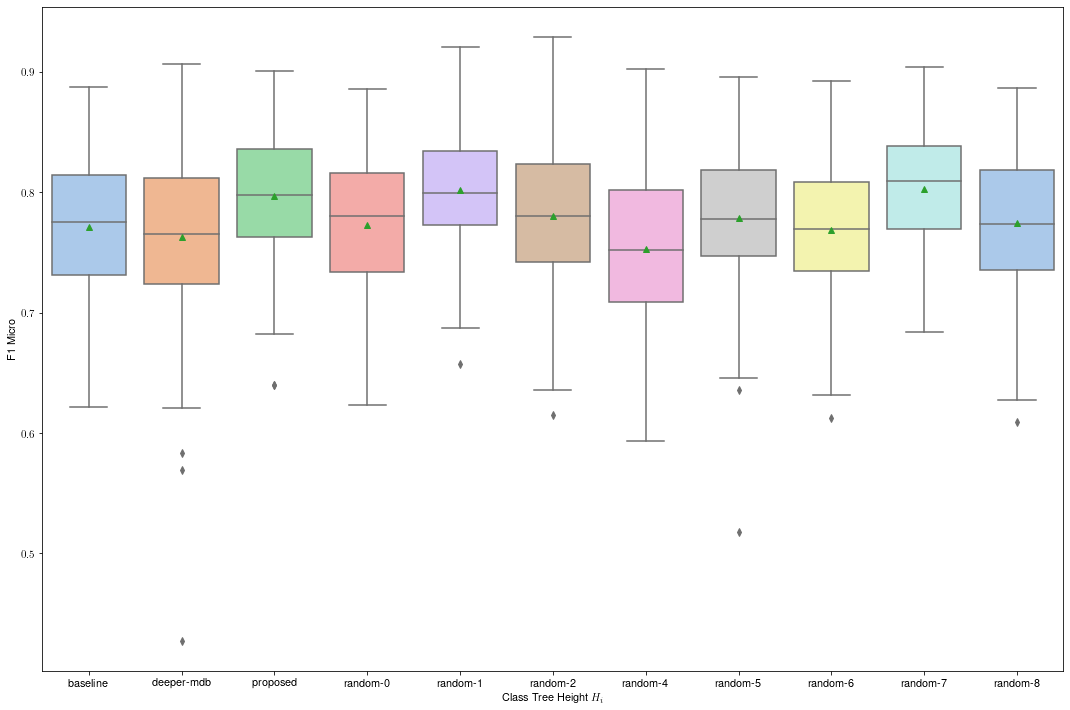

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
sns.boxplot(data=df, x='name', y='value',  palette="pastel", showmeans=True)
# plt.title('F1 Micro')
plt.ylabel('F1 Micro')
plt.xlabel('Class Tree Height $H_i$')
# plt.ylim([0.5, 0.99])
plt.tight_layout()
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'height-vs-f1.png')
fig


In [113]:
results = {}
for name in fulldf.name.unique():
    results[name] = []
    for metric in fulldf.metric.unique():
        results[name].append(f'{name} {metric} \n mean:{np.mean(fulldf[(fulldf.name == name) & (fulldf.metric == metric) & (fulldf.n_shot == 8)].value) }\n')

In [115]:
results

{'baseline': ['baseline f1_micro \n mean:0.7481625000000001\n',
  'baseline f1_macro \n mean:0.7498031596234261\n',
  'baseline epi-accuracy \n mean:0.7481625\n',
  'baseline hlca-mistake \n mean:4.091982853103131\n',
  'baseline hierarchical-precision \n mean:0.8129805555555558\n',
  'baseline hierarchical-recall \n mean:0.8129805555555558\n',
  'baseline hierarchical-f1 \n mean:0.8129805555555558\n'],
 'random-1': ['random-1 f1_micro \n mean:0.7211652777777777\n',
  'random-1 f1_macro \n mean:0.7257811353200032\n',
  'random-1 epi-accuracy \n mean:0.7211652777777777\n',
  'random-1 hlca-mistake \n mean:4.561213204767021\n',
  'random-1 hierarchical-precision \n mean:0.8191319444444445\n',
  'random-1 hierarchical-recall \n mean:0.8191319444444445\n',
  'random-1 hierarchical-f1 \n mean:0.8191319444444445\n'],
 'random-4': ['random-4 f1_micro \n mean:0.6818611111111113\n',
  'random-4 f1_macro \n mean:0.687946406006603\n',
  'random-4 epi-accuracy \n mean:0.6818611111111113\n',
  'ran

In [119]:
df = fulldf[fulldf.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')

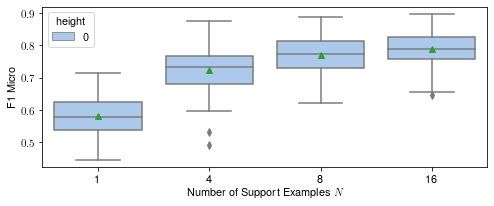

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='n_shot', y='value', hue='height', palette="pastel", showmeans=True)
# plt.title('F1 Micro')
plt.ylabel('F1 Micro')
plt.xlabel('Number of Support Examples $N$')
plt.tight_layout()
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'n_shot-vs-f1.png')
fig

In [17]:
df = fulldf[fulldf.metric == 'hlca-mistake']
df = df[df.tag == 'protonet']
df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')
df.value = df.value / 5

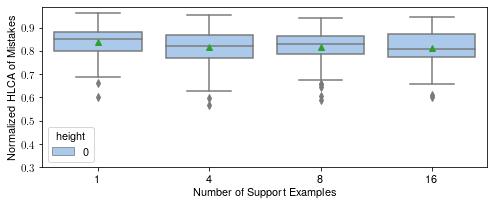

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='n_shot', y='value', hue='height', palette="pastel", showmeans=True)
# plt.title('')
plt.ylabel('Normalized HLCA of Mistakes')
plt.xlabel('Number of Support Examples')
plt.tight_layout()
plt.ylim([0.3, 0.99])
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'normalized-hlca.png')
fig

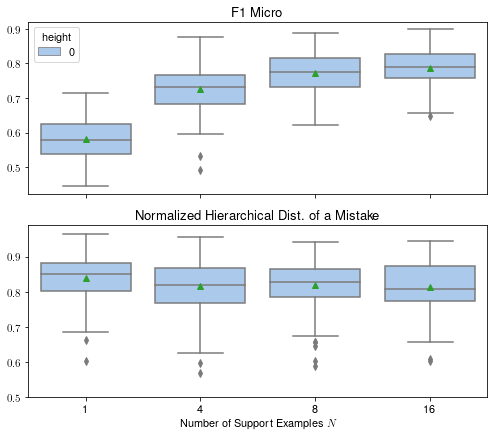

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(7, 6), sharex=True)


# Bulbasaur
df = fulldf[fulldf.metric == 'hlca-mistake']
df = df[df.tag == 'protonet']
df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')
df.value = df.value / 5

sns.boxplot(data=df, ax=axes[1], x='n_shot', y='value', hue='height', palette="pastel", showmeans=True)
axes[1].set_title('Normalized Hierarchical Dist. of a Mistake')
axes[1].set_ylim([0.5, 0.99])
axes[1].set_xlabel('')
axes[1].get_legend().remove()
axes[1].set_ylabel('')

# Charmander
df = fulldf[fulldf.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')

sns.boxplot(ax=axes[0], data=df, x='n_shot', y='value', hue='height', palette="pastel", showmeans=True)
axes[0].set_title('F1 Micro')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# axes[0].set_xlabel('Number of Support Examples $N$')

# sns.boxplot(data=df, x='n_shot', y='value', hue='height', palette="pastel", showmeans=True)

plt.tight_layout()
plt.xlabel('Number of Support Examples $N$')
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'n_shot-vs-f1-hlca.png')
fig

- Figure 3: we pick the best n_shot and the best height, and we compare with 10 other random hierarchies. We don't want to show boxplots for all 10 of these random hierarchies, so we pick the best and the worst. This figure has 4 boxplots: random-best, random-worst, proposed and baseline.
The 10 random models are almost done training. Do you want to be in charge of running eval, analysis on the random taxonomies + proposed + baseline, picking the best/worst random hierarchies, and making the boxplot for that?

In [74]:
metric_labels = {
    'f1_micro' : 'F1 Micro',
    'f1_macro':'F1 Macro',
    'epi-accuracy':'Episode Accuracy',
    'hlca-mistake':'HCLA Mistake',
    'hierarchical-precision':'Hierarchical Precision',
    'hierarchical-recall':'Hierarchical Recall',
    'hierarchical-f1':'Hierarchical F1'
}

metrics = {metric:[] for metric in fulldf.metric.unique()}

for name in fulldf.name.unique():
    for metric in fulldf.metric.unique():
        #for n in fulldf.n_shot.unique():
        if 'random' in name:
            val = np.mean(fulldf[(fulldf.name == name) & (fulldf.metric == metric) & (fulldf.n_shot == 8)].value)
            metrics[metric].append((name, val, 8))
for metric in metrics:
    metrics[metric] = sorted_metrics = sorted(metrics[metric], key=lambda a: a[1])
    print(f'Highest {metric}: {sorted_metrics[-1]}\nLowest {metric}: {sorted_metrics[0]}]\n')

Highest f1_micro: ('random-7', 0.7296263888888889, 8)
Lowest f1_micro: ('random-4', 0.6818611111111113, 8)]

Highest f1_macro: ('random-7', 0.7302059573350504, 8)
Lowest f1_macro: ('random-4', 0.687946406006603, 8)]

Highest epi-accuracy: ('random-7', 0.7296263888888889, 8)
Lowest epi-accuracy: ('random-4', 0.6818611111111113, 8)]

Highest hlca-mistake: ('random-7', 4.576544855310045, 8)
Lowest hlca-mistake: ('random-5', 4.380501432681465, 8)]

Highest hierarchical-precision: ('random-1', 0.8191319444444445, 8)
Lowest hierarchical-precision: ('random-4', 0.7776819444444442, 8)]

Highest hierarchical-recall: ('random-1', 0.8191319444444445, 8)
Lowest hierarchical-recall: ('random-4', 0.7776819444444442, 8)]

Highest hierarchical-f1: ('random-1', 0.8191319444444445, 8)
Lowest hierarchical-f1: ('random-4', 0.7776819444444442, 8)]



In [ ]:
resu

In [111]:
for metric, rand_mets in metrics.items():
    print(metric)
    # highest random tree for this metric
    highest_rand = rand_mets[-1][0]
    
    # lowest random tree for this metric
    lowest_rand = rand_mets[0][0]
    
    # get the runs we're intressted in 
    runs = ['baseline', 'proposed', lowest_rand, highest_rand]
    df = fulldf[(fulldf.name.isin(runs)) & (fulldf.n_shot == 8) & (fulldf.metric == metric)]
    
    # getting min and max values for ylim
    run_min = np.min(df.value) - .05 # add some spacing
    run_max = np.max(df.value) + 0.05 # spacing
    
    plt.rcParams["figure.figsize"] = (5,10)
    sns.boxplot(data=df, x='name', y='value', palette="pastel", showmeans=True)
    
    title = f'Comparison {metric_labels[metric]}'
    plt.title(title)
    plt.ylabel(metric_labels[metric])
    plt.xlabel('Model Type')
    
    plt.tight_layout()
    plt.ylim([run_min, run_max])
    fig = plt.gcf()
    plt.close()
    
    file_name = f'model-comparison-{metric}'
    fig.savefig(output_dir / file_name)

f1_micro
f1_macro
epi-accuracy
hlca-mistake
hierarchical-precision
hierarchical-recall
hierarchical-f1


In [65]:
fulldf[fulldf.name.isin(['random-1', 'random-2'])].name.unique()

array(['random-1', 'random-2'], dtype=object)